# Metrics Distribution

In [2]:
import pandas as pd

csv_path = "drive/MyDrive/Deep Learning/results_final.csv"
df = pd.read_csv(csv_path)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,name,model,psnr,ssim,lpips
0,00020.png,HAT,23.575221,0.790215,0.193824
1,00023.png,HAT,23.604026,0.608360,0.510696
2,00029.png,HAT,25.011165,0.835850,0.185024
3,00044.png,HAT,21.146529,0.680986,0.333670
4,00062.png,HAT,28.586586,0.886996,0.157667


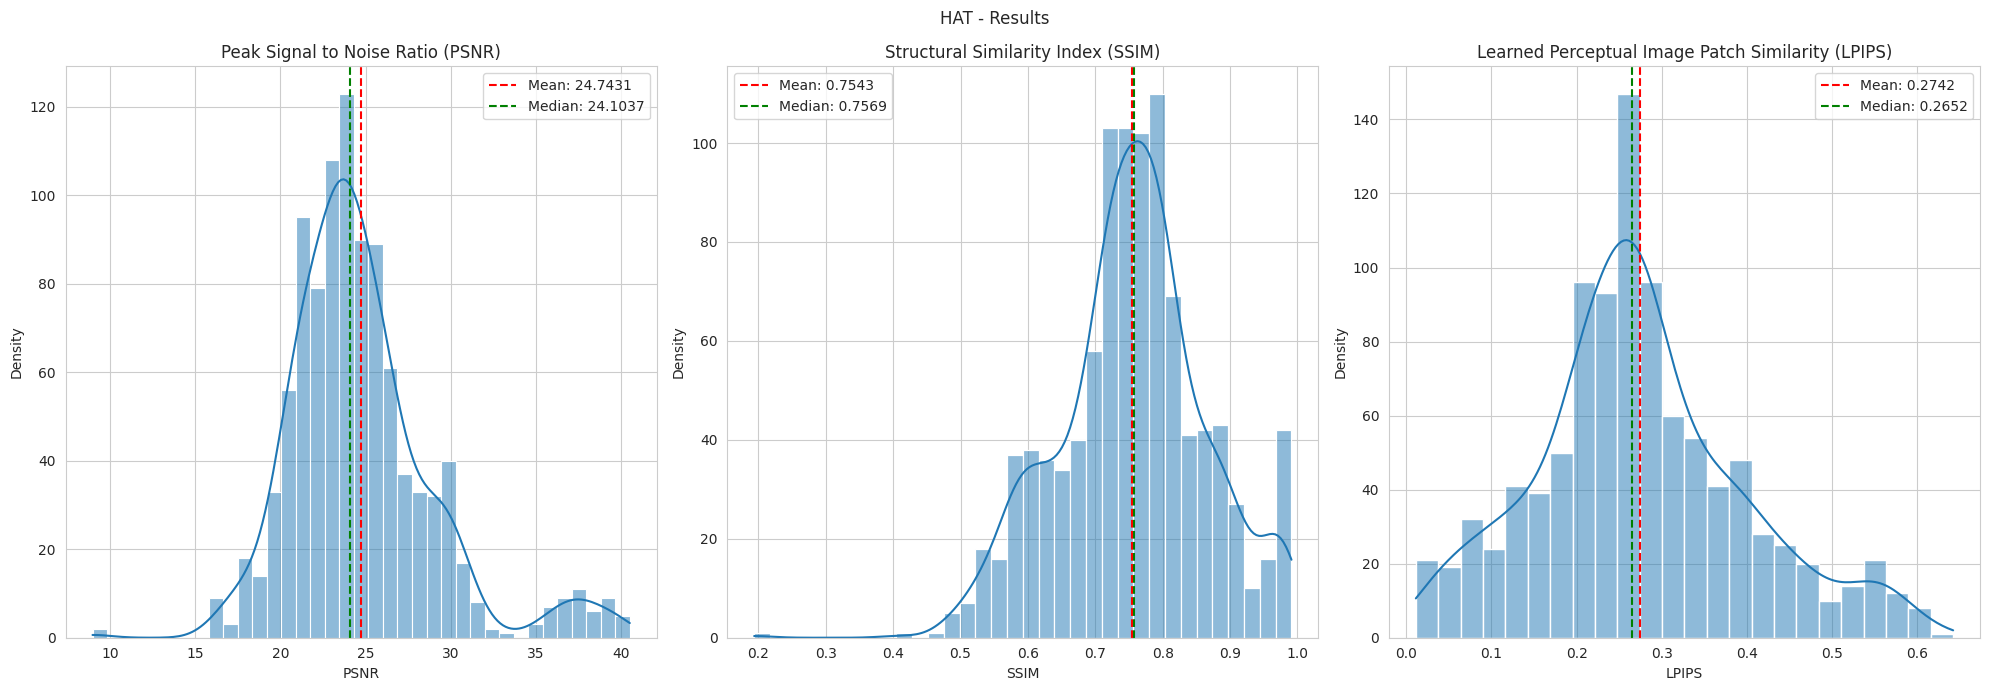

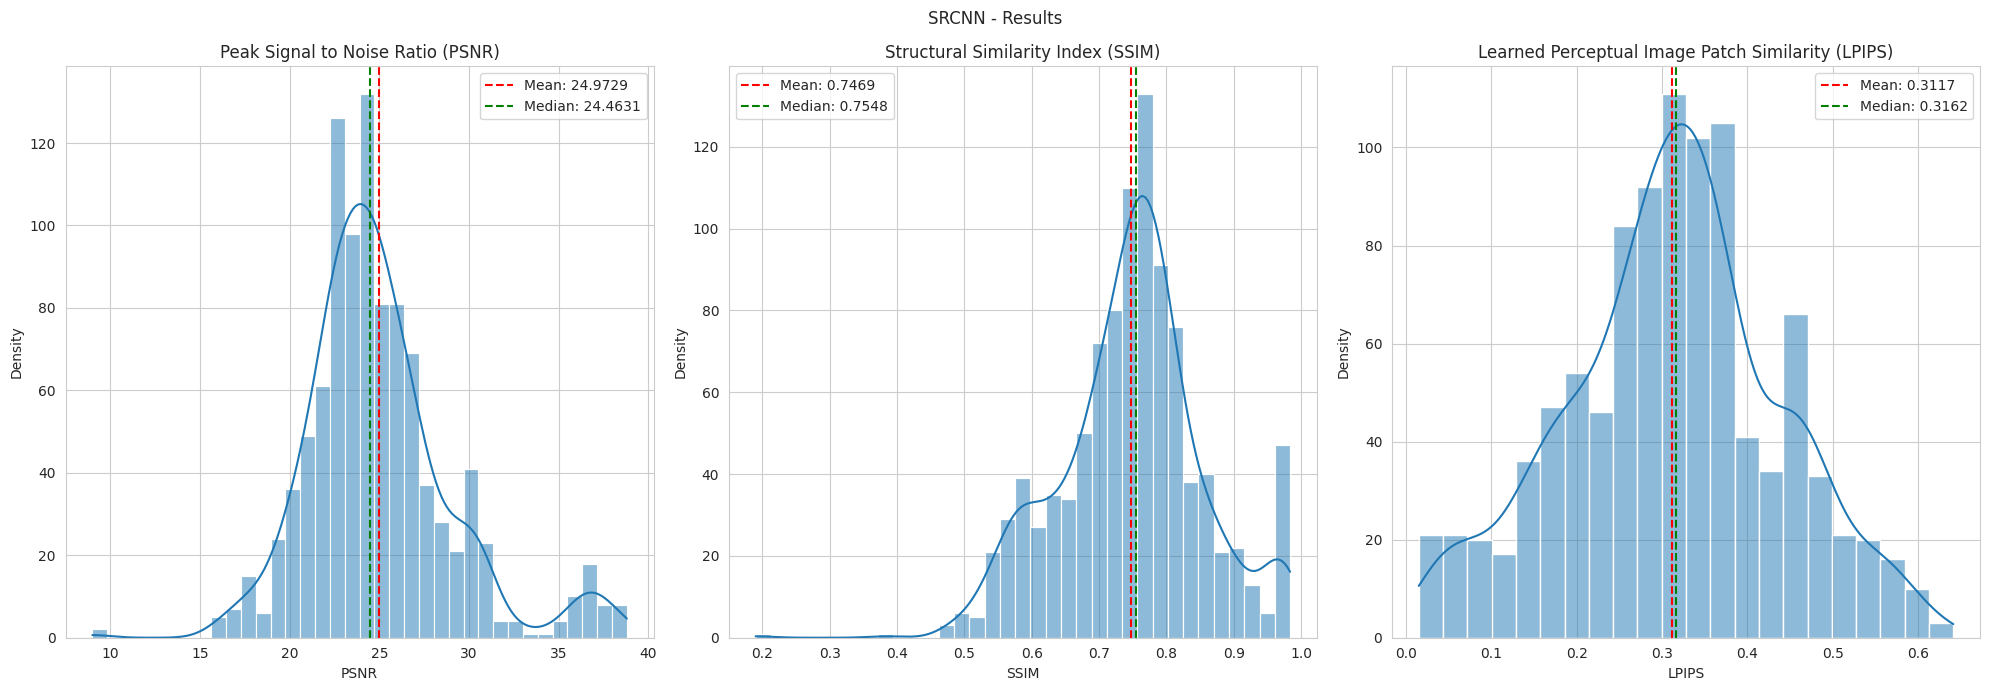

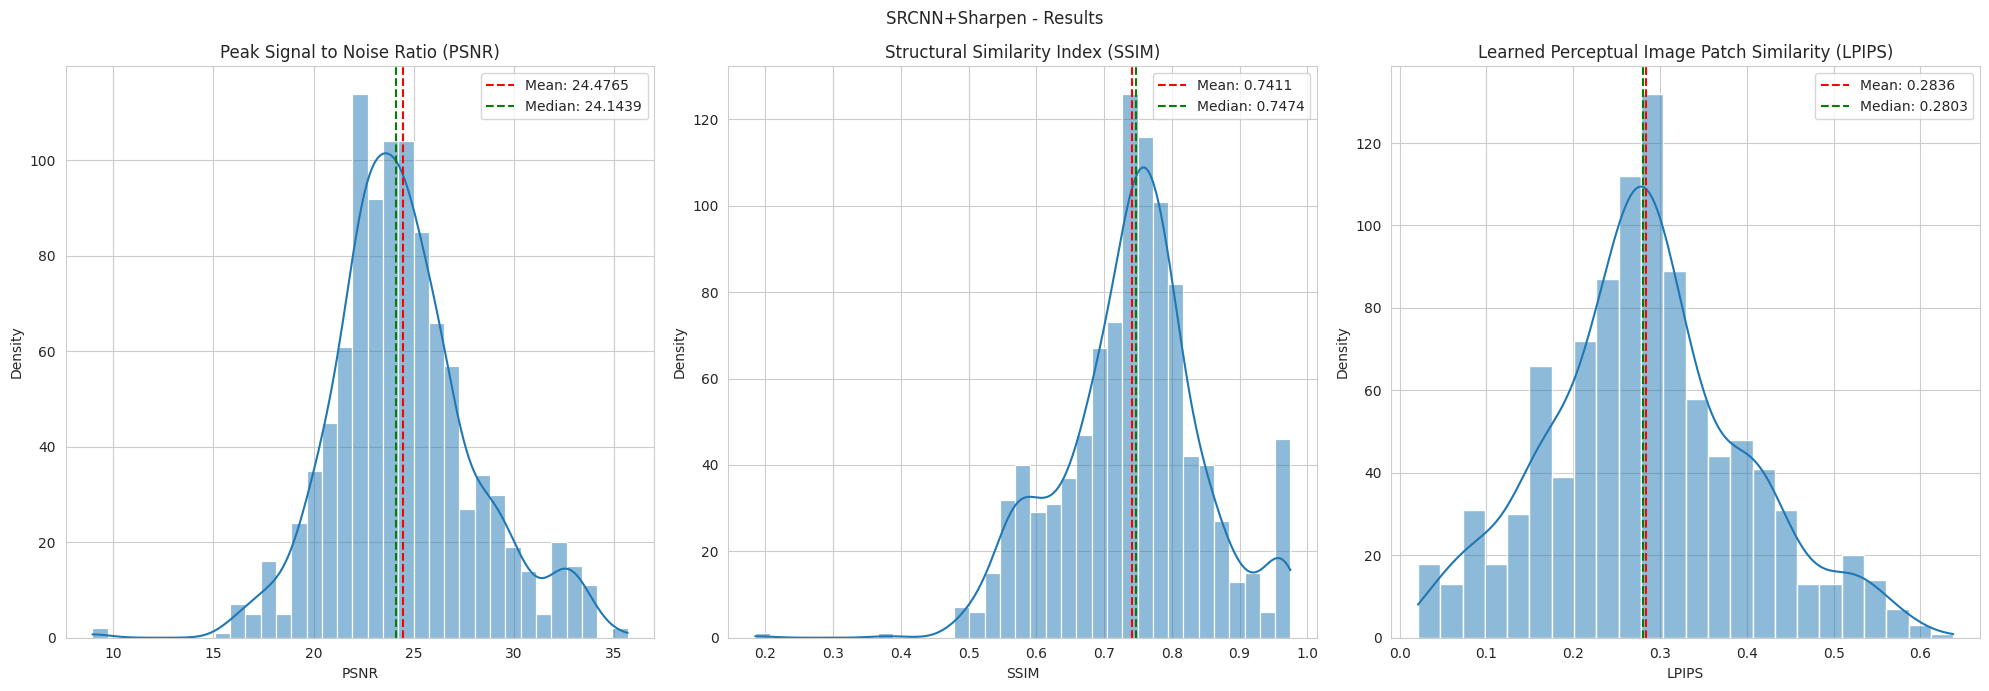

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

model_types = ["HAT", "SRCNN", "SRCNN+Sharpen"]

for model in model_types:
    model_df = df[df["model"] == model].copy()

    fig, ax = plt.subplots(1, 3, figsize=(20, 7))
    fig.suptitle(f"{model} - Results")

    sns.histplot(model_df["psnr"], kde=True, ax=ax[0])
    psnr_mean = model_df["psnr"].mean()
    psnr_median = model_df["psnr"].median()
    ax[0].set_title("Peak Signal to Noise Ratio (PSNR)")
    ax[0].set_xlabel("PSNR")
    ax[0].set_ylabel("Density")
    ax[0].axvline(psnr_mean, color="r", linestyle="--", label=f"Mean: {psnr_mean:.4f}")
    ax[0].axvline(psnr_median, color="g", linestyle="--", label=f"Median: {psnr_median:.4f}")
    ax[0].legend()

    sns.histplot(model_df["ssim"], kde=True, ax=ax[1])
    ssim_mean = model_df["ssim"].mean()
    ssim_median = model_df["ssim"].median()
    ax[1].set_title("Structural Similarity Index (SSIM)")
    ax[1].set_xlabel("SSIM")
    ax[1].set_ylabel("Density")
    ax[1].axvline(ssim_mean, color="r", linestyle="--", label=f"Mean: {ssim_mean:.4f}")
    ax[1].axvline(ssim_median, color="g", linestyle="--", label=f"Median: {ssim_median:.4f}")
    ax[1].legend()

    sns.histplot(model_df["lpips"], kde=True, ax=ax[2])
    lpips_mean = model_df["lpips"].mean()
    lpips_median = model_df["lpips"].median()
    ax[2].set_title("Learned Perceptual Image Patch Similarity (LPIPS)")
    ax[2].set_xlabel("LPIPS")
    ax[2].set_ylabel("Density")
    ax[2].axvline(lpips_mean, color="r", linestyle="--", label=f"Mean: {lpips_mean:.4f}")
    ax[2].axvline(lpips_median, color="g", linestyle="--", label=f"Median: {lpips_median:.4f}")
    ax[2].legend()

    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/Deep Learning/{model}-pdi", dpi=450, bbox_inches='tight')
    plt.show()

# Inference Distribution

In [60]:
df_infer_srcnn = pd.read_csv("/content/drive/MyDrive/Deep Learning/SRCNN/intermediate_results_w_inference.csv")
df_infer_srcnn = df_infer_srcnn["inference_time_s"].copy()
print(f"Tempo médio de inferência SRCNN: {df_infer_srcnn.mean():.8f} segundos")
ms_time = df_infer_srcnn.mean() * 1000
print(f"Tempo médio de inferência SRCNN: {ms_time:.8f} milissegundos")

sd = df_infer_srcnn.std()
print(f"Desvio padrão de inferência SRCNN: {sd:.8f} segundos")
sd_ms = sd * 1000
print(f"Desvio padrão de inferência SRCNN: {sd_ms:.8f} milissegundos")

Tempo médio de inferência SRCNN: 0.00109332 segundos
Tempo médio de inferência SRCNN: 1.09332252 milissegundos
Desvio padrão de inferência SRCNN: 0.01748104 segundos
Desvio padrão de inferência SRCNN: 17.48103855 milissegundos


In [67]:
df_infer_srcnn.shape

(1000,)

In [61]:
df_infer_hat = pd.read_csv("/content/drive/MyDrive/Deep Learning/HAT/hat_inference_times.csv")
df_infer_hat["time_s"] = df_infer_hat["inference_time_ms"] / 1000
df_infer_hat.head()

,filename,inference_time_ms,time_s
0,00020.png,4614.040649,4.614041
1,00020.png,2146.864347,2.146864
2,00023.png,2121.450548,2.121451
3,00029.png,2087.559982,2.087560
4,00044.png,2082.452220,2.082452


In [63]:
print(f"Tempo médio de inferência HAT: {df_infer_hat['time_s'].mean():.8f} segundos")
print(f"Tempo médio de inferência HAT: {df_infer_hat['time_s'].mean() * 1000:.8f} milissegundos")

Tempo médio de inferência HAT: 0.07842106 segundos
Tempo médio de inferência HAT: 2274.68707660 milissegundos


In [66]:
df_infer_hat.shape

(1001, 3)

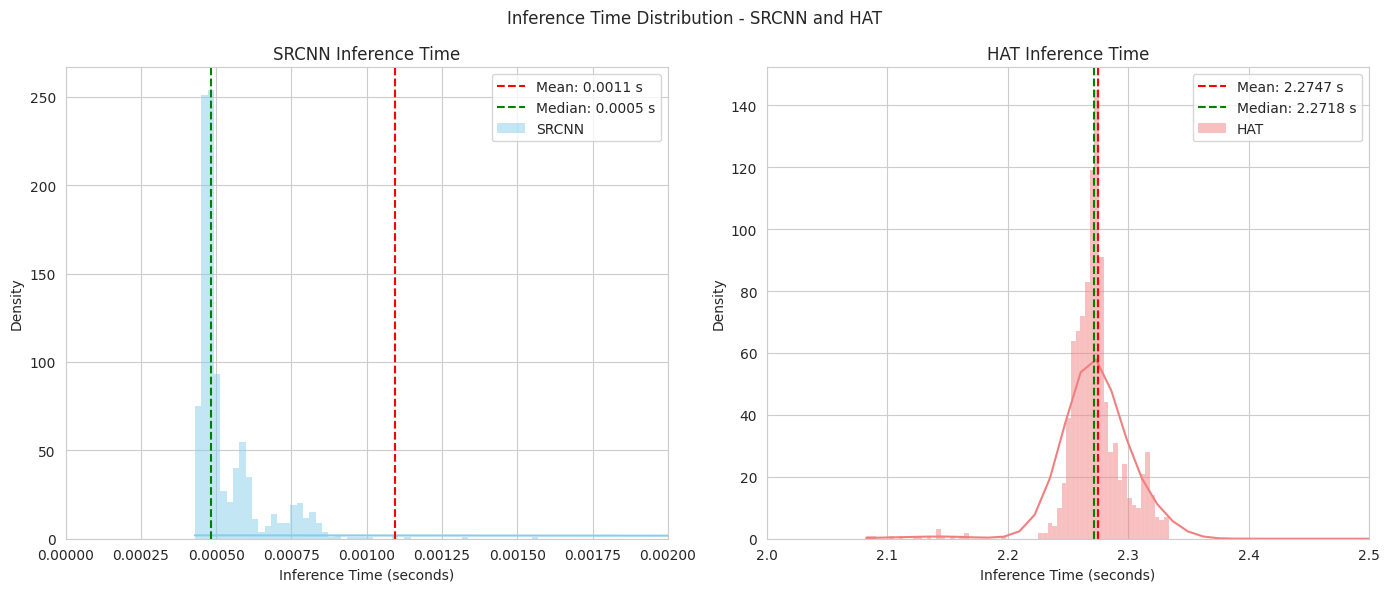

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Inference Time Distribution - SRCNN and HAT")

sns.histplot(df_infer_srcnn, kde=True, ax=ax[0], color='skyblue', label='SRCNN')
srcnn_mean = df_infer_srcnn.mean()
srcnn_median = df_infer_srcnn.median()
ax[0].set_title("SRCNN Inference Time")
ax[0].set_xlabel("Inference Time (seconds)")
ax[0].set_ylabel("Density")
ax[0].axvline(srcnn_mean, color="r", linestyle="--", label=f"Mean: {srcnn_mean:.4f} s")
ax[0].axvline(srcnn_median, color="g", linestyle="--", label=f"Median: {srcnn_median:.4f} s")
ax[0].set_xlim(0, 0.002)
ax[0].legend(loc='upper right')

sns.histplot(df_infer_hat['time_s'], kde=True, ax=ax[1], color='lightcoral', label='HAT')
hat_mean = df_infer_hat['time_s'].mean()
hat_median = df_infer_hat['time_s'].median()
ax[1].set_title("HAT Inference Time")
ax[1].set_xlabel("Inference Time (seconds)")
ax[1].set_ylabel("Density")
ax[1].axvline(hat_mean, color="r", linestyle="--", label=f"Mean: {hat_mean:.4f} s")
ax[1].axvline(hat_median, color="g", linestyle="--", label=f"Median: {hat_median:.4f} s")
ax[1].set_xlim(2, 2.5)
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Deep Learning/inference_time_distribution", dpi=450, bbox_inches='tight')
plt.show()